## Prodigy Task_02 - Titanic data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!git clone https://github.com/Venkata-Suresh-Babu/Prrodigy_DS_02.git

fatal: destination path 'Prrodigy_DS_02' already exists and is not an empty directory.


In [7]:
survival_df = pd.read_csv('/content/Prrodigy_DS_02/gender_submission.csv')
survival_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
test_df = pd.read_csv('/content/Prrodigy_DS_02/test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,$7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,$7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,$9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,$8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,$12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,$8.05,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,$108.90,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,$7.25,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,$8.05,NaN,S


**Cleaning the data**

In [9]:
survival_df.isna().sum()
print("")
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
survival_df.dropna(inplace=True)
survival_df.isna().sum()
print("")
test_df.dropna(inplace=True)
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
survival_df.describe()
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,1.137931,39.247126,0.597701,0.482759
std,126.751901,0.435954,15.218730,0.637214,0.860801
min,904.000000,1.000000,1.000000,0.000000,0.000000
25%,986.000000,1.000000,27.000000,0.000000,0.000000
50%,1094.000000,1.000000,39.000000,1.000000,0.000000
75%,1216.000000,1.000000,50.000000,1.000000,1.000000
max,1306.000000,3.000000,76.000000,3.000000,4.000000


In [12]:
#joining of two tables with PassengerId
titanic_df = pd.merge(survival_df, test_df, on='PassengerId')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,$82.27,B45,S
1,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,$61.18,E31,S
2,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,$262.38,B57 B59 B63 B66,C
3,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,$61.98,B36,C
4,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,$30.50,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
82,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,$27.72,D40,C
83,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,$13.86,D38,C
84,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,$211.50,C80,C
85,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,$90.00,C78,Q


In [13]:
#Number of Males survived in Titanic
males_Survived = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Survived'] == 0)].sum()
males_Survived

PassengerId                                                47736
Survived                                                       0
Pclass                                                        50
Name           Brady, Mr. John BertramMock, Mr. Philipp Edmun...
Sex            malemalemalemalemalemalemalemalemalemalemalema...
Age                                                       1672.5
SibSp                                                         21
Parch                                                         14
Ticket         11305413236PC 1759413695348122PC 176082543PC 1...
Fare           $30.50 $57.75 $29.70 $60.00 $7.65 $262.38 $28....
Cabin          A21C78A9C31F G63B57 B59 B63 B66C53D43C132C55 C...
Embarked             SCCSSCCCCSSCCCSCCCCCSCCCSCCSSSSCCSCSSSSSCCC
dtype: object

In [14]:
females_Survived = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Survived'] == 1)].sum()
females_Survived

PassengerId                                                48200
Survived                                                      44
Pclass                                                        49
Name           Snyder, Mrs. John Pillsbury (Nelle Stevenson)C...
Sex            femalefemalefemalefemalefemalefemalefemalefema...
Age                                                       1742.0
SibSp                                                         31
Parch                                                         28
Ticket         21228W.E.P. 5734PC 17608113509117531181319950P...
Fare           $82.27 $61.18 $262.38 $61.98 $52.55 $76.29 $26...
Cabin          B45E31B57 B59 B63 B66B36D19D15C23 C25 C27B61C2...
Embarked            SSCCSCSCSCSSSCCSSCCSSCSCCCSCCSCSCCSCCSSSCSQC
dtype: object

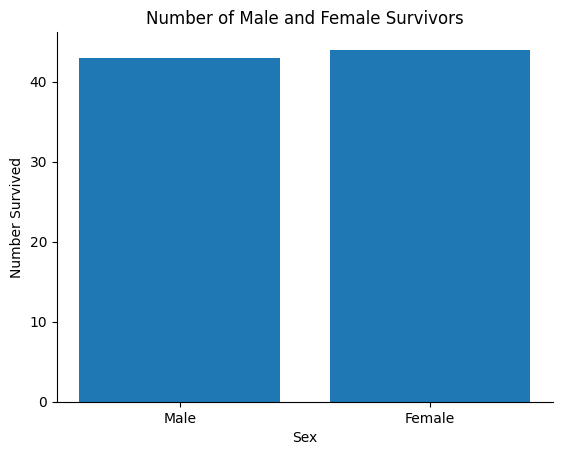

In [15]:
# Count the number of male and female survivors
male_survived_count = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Survived'] == 0)].shape[0]
female_survived_count = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Survived'] == 1)].shape[0]

# Create a bar chart instead of a histogram
plt.bar(['Male', 'Female'], [male_survived_count, female_survived_count])
plt.xlabel('Sex')
plt.ylabel('Number Survived')
plt.title('Number of Male and Female Survivors')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()